# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlchecks.checks.leakage import *
from mlchecks.base import Dataset

# Generating data:

In [2]:
np.random.seed(42)
df = pd.DataFrame(np.random.randn(100, 3), columns=['x1', 'x2', 'x3'])
df['x4'] = df['x1'] * 0.05 + df['x2']
df['x5'] = df['x2'] + 0.01 * df['x1']
df['label'] = df['x5'].apply(lambda x: 'v1' if x < 0 else 'v2')


In [3]:
dataset = Dataset(df, label='label', index = 'x1', date = 'x2')

# Running identifier_leakage check:

Identifier Leakage

Search for leakage in identifiers (Date, Index).

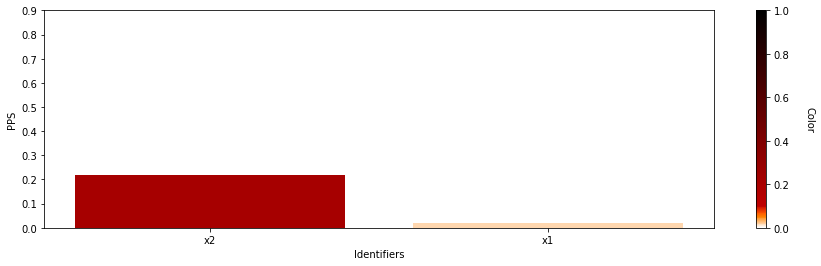

The PPS represents the ability of a feature to single-handedly predict another feature or label.

For Identifier columns (Index/Date) PPS should be 0, otherwise date and index have some effect on the label.

In [4]:
identifier_leakage(dataset)

# Using the SingleFeatureContribution check class:

Identifier Leakage

Search for leakage in identifiers (Date, Index).

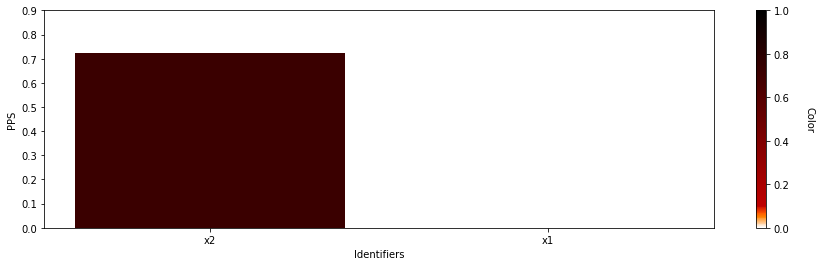

The PPS represents the ability of a feature to single-handedly predict another feature or label.

For Identifier columns (Index/Date) PPS should be 0, otherwise date and index have some effect on the label.

In [5]:

my_check = IdentifierLeakage(ppscore_params={'sample': 10})
my_check.run(dataset=dataset)